In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [14]:
df = pd.read_csv('ozone.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [15]:
df.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

<AxesSubplot:xlabel='Ozone', ylabel='Count'>

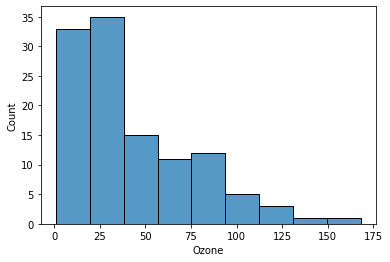

In [16]:
sns.histplot(df.Ozone)

<AxesSubplot:xlabel='Solar.R', ylabel='Count'>

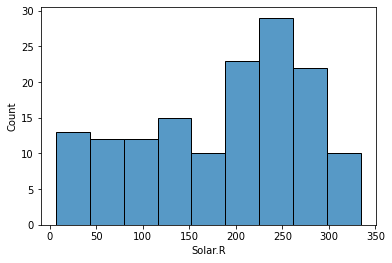

In [17]:
sns.histplot(df['Solar.R'])

<AxesSubplot:xlabel='Wind', ylabel='Count'>

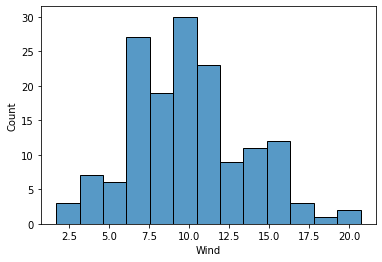

In [18]:
sns.histplot(df['Wind'])

<AxesSubplot:xlabel='Temp', ylabel='Count'>

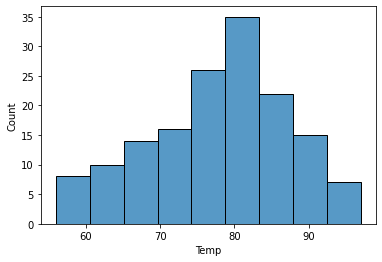

In [19]:
sns.histplot(df['Temp'])

In [20]:
df['Ozone'].fillna(method='bfill', inplace=True)
df['Ozone'].fillna(method='pad', inplace=True)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,28.0,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,14.0,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [21]:
df = df.loc[df['Solar.R'].dropna().index]
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,14.0,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [22]:
df_corr = df.corr()
df_corr

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.085313,-0.540390,0.470623,0.007871,0.201285
Solar.R,0.085313,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.540390,-0.056792,1.000000,-0.453847,-0.162253,0.025307
Temp,0.470623,0.275840,-0.453847,1.000000,0.380970,-0.131936
Month,0.007871,-0.075301,-0.162253,0.380970,1.000000,-0.006977
Day,0.201285,-0.150275,0.025307,-0.131936,-0.006977,1.000000


In [34]:
X = df[['Solar.R','Wind','Temp']]
y = df['Ozone']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaled_standard = StandardScaler()

In [37]:
scaled_standard.fit(X_train)
scaled_standard_transform = scaled_standard.transform(X_train)

In [38]:
scaled_standard_test = scaled_standard.transform(X_test)

## LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(scaled_standard_transform, y_train)

LogisticRegression()

In [40]:
lg.score(scaled_standard_transform, y_train)

0.1896551724137931

## LinearRegression

In [41]:
# 다중회귀분석을 이용해서 오존량을 예측해봄
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_standard_transform, y_train)

LinearRegression()

In [42]:
lr.score(scaled_standard_transform, y_train)

0.3787065218117569